In [2]:
import pandas as pd
import numpy as np
from numpy import unique
from numpy import where
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
from sklearn import metrics
import scipy.cluster.hierarchy as sch
%matplotlib inline

In [3]:
dat = pd.read_excel("FAOSTAT_data.xlsx")

In [4]:
dat.head()

,Domain Code,Area,Element Code,Element,Item Code (CPC),Item,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Unit
0,FBS,Afghanistan,5511,Production,S2511,Wheat and products,4532,3388,5050,5169,5370,4673,4555,4281,3613,4890,5185,1000 tonnes
1,FBS,Afghanistan,5123,Losses,S2511,Wheat and products,678,508,758,775,803,701,684,642,542,733,778,1000 tonnes
2,FBS,Afghanistan,5511,Production,S2807,Rice and products,672,672,500,512,537,410,357,338,352,383,440,1000 tonnes
3,FBS,Afghanistan,5123,Losses,S2807,Rice and products,47,47,35,36,36,29,25,24,25,27,31,1000 tonnes
4,FBS,Afghanistan,5511,Production,S2513,Barley and products,437,306,504,514,521,403,302,95,57,124,128,1000 tonnes


In [5]:
dat.isnull().sum()

Domain Code        0
Area               0
Element Code       0
Element            0
Item Code (CPC)    0
Item               0
Y2010              0
Y2011              0
Y2012              0
Y2013              0
Y2014              0
Y2015              0
Y2016              0
Y2017              0
Y2018              0
Y2019              0
Y2020              0
Unit               0
dtype: int64

In [6]:
country = list(dat['Area'].unique())
country
year = list(dat.iloc[:,6:17].columns)
year
len(country)

30

In [7]:
dat.dtypes

Domain Code        object
Area               object
Element Code        int64
Element            object
Item Code (CPC)    object
Item               object
Y2010               int64
Y2011               int64
Y2012               int64
Y2013               int64
Y2014               int64
Y2015               int64
Y2016               int64
Y2017               int64
Y2018               int64
Y2019               int64
Y2020               int64
Unit               object
dtype: object

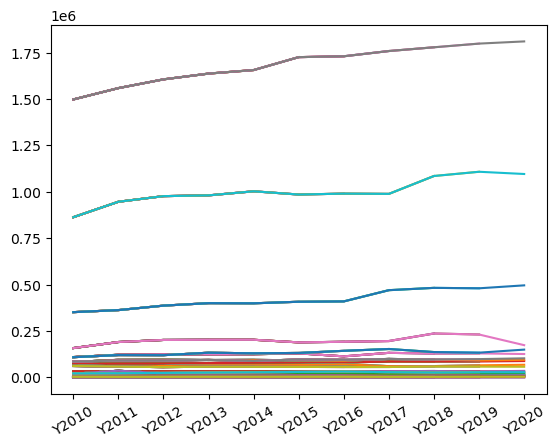

In [11]:

for nation in country:  
    prod = []
    for duration in year:
        prod.append(dat[duration][dat['Element']=='Production'][dat['Area'] == nation].sum())
        plt.plot(prod, label=nation)
plt.xticks(np.arange(11), tuple(year), rotation=30)
plt.savefig("prod.png")
plt.show()

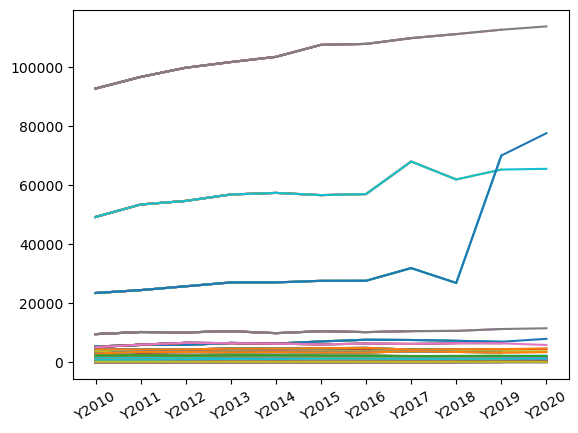

In [12]:
for nation in country:  
    prod = []
    for duration in year:
        prod.append(dat[duration][dat['Element']=='Losses'][dat['Area'] == nation].sum())
        plt.plot(prod, label=nation)
plt.xticks(np.arange(11), tuple(year), rotation=30)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


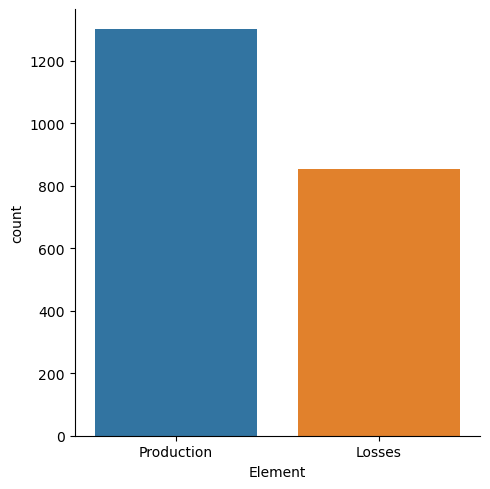

In [22]:
sns.catplot("Element",data=dat,kind="count")
plt.show()

In [13]:
prod_dict={}
loss_dict={}
for nation in country:  
    prod = []
    loss = []
    for duration in year:
        prod.append(dat[duration][dat['Element']=="Production"][dat['Area'] == nation].sum())
        loss.append(dat[duration][dat['Element']=="Losses"][dat['Area'] == nation].sum())
    prod_dict[nation]=prod
    loss_dict[nation]=loss
prod_dat=pd.DataFrame(prod_dict)
loss_dat=pd.DataFrame(loss_dict)

In [14]:
prod_dat.head()

,Afghanistan,Armenia,Azerbaijan,Bangladesh,Bhutan,Cambodia,"China, Hong Kong SAR","China, mainland",Democratic People's Republic of Korea,India,...,Pakistan,Philippines,Republic of Korea,Saudi Arabia,Sri Lanka,Tajikistan,Thailand,Trkiye,Turkmenistan,Uzbekistan
0,8824,2027,5583,73362,0,15254,101,1497232,12575,862848,...,108902,83352,20436,6095,9526,4420,157981,85643,3660,21741
1,7234,2438,6138,74833,0,19560,110,1558339,12622,946148,...,120405,94678,20753,6075,9044,4372,190672,90585,3225,22607
2,9084,2737,6547,75116,0,20061,119,1605387,12947,976438,...,119784,95737,19843,5955,9260,4866,201781,89964,3400,24315
3,9246,2880,6755,77148,0,20324,118,1636586,13303,980541,...,133141,93625,20353,5940,10220,5372,202741,94300,3655,25986
4,10035,3071,5990,79216,0,20187,108,1655594,13066,1002532,...,129863,94597,21681,4630,9367,5158,202835,88500,3535,27669


In [15]:
loss_dat.head()

,Afghanistan,Armenia,Azerbaijan,Bangladesh,Bhutan,Cambodia,"China, Hong Kong SAR","China, mainland",Democratic People's Republic of Korea,India,...,Pakistan,Philippines,Republic of Korea,Saudi Arabia,Sri Lanka,Tajikistan,Thailand,Trkiye,Turkmenistan,Uzbekistan
0,1086,171,158,3577,0,902,115,92781,916,49266,...,5394,2989,2336,549,679,260,5166,9583,204,956
1,862,177,162,3641,0,1203,125,96721,921,53500,...,5915,3580,2418,556,657,257,6023,10302,186,983
2,1134,224,165,3605,0,1238,129,99844,956,54717,...,5915,3529,2273,574,675,315,6630,10166,199,1093
3,1165,251,166,3765,0,1245,121,101765,973,56895,...,6608,3401,2418,562,718,338,6532,10576,221,1183
4,1251,282,444,3885,0,1337,127,103526,965,57433,...,6380,3471,2450,351,721,323,6335,9912,197,1180


In [16]:
prod_data_view = pd.DataFrame.transpose(prod_dat)
prod_data_view.columns = year
loss_dat_view = pd.DataFrame.transpose(loss_dat)
loss_dat_view.columns = year

In [25]:
prod_data_view.head(10)

,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
Afghanistan,8824,7234,9084,9246,10035,9252,10260,9346,8195,11344,12473
Armenia,2027,2438,2737,2880,3071,3161,2786,2452,1967,1835,2033
Azerbaijan,5583,6138,6547,6755,5990,6800,7003,7092,7605,8253,8096
Bangladesh,73362,74833,75116,77148,79216,80878,80106,85728,85197,85607,88191
Bhutan,0,0,0,0,0,0,0,1,2,250,256
Cambodia,15254,19560,20061,20324,20187,20657,21923,22814,23806,23598,23962
"China, Hong Kong SAR",101,110,119,118,108,107,104,105,106,112,112
"China, mainland",1497232,1558339,1605387,1636586,1655594,1725198,1729801,1758079,1778259,1798078,1809857
Democratic People's Republic of Korea,12575,12622,12947,13303,13066,12498,12070,11474,11077,12834,11703
India,862848,946148,976438,980541,1002532,985100,990013,988598,1084939,1107728,1095732


In [32]:
loss_dat_view.head()

,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
Afghanistan,1086,862,1134,1165,1251,1140,1243,1118,923,1291,1436
Armenia,171,177,224,251,282,311,260,236,207,167,151
Azerbaijan,158,162,165,166,444,424,497,484,482,535,479
Bangladesh,3577,3641,3605,3765,3885,4012,4061,4388,4250,4367,4615
Bhutan,0,0,0,0,0,0,0,0,0,74,80


In [28]:
Avg_production = []
for i in range(len(country)):
    Avg_production.append(prod_data_view.iloc[i,:].values.mean())
prod_data_view['Avgerage_production'] = Avg_production

prod_data_view['Country_Rank'] = prod_data_view['Avgerage_production'].rank(ascending=False)

prod_data_view.head(5)

,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Avgerage_production,Country_Rank
Afghanistan,8824,7234,9084,9246,10035,9252,10260,9346,8195,11344,12473,8837.314685,20.0
Armenia,2027,2438,2737,2880,3071,3161,2786,2452,1967,1835,2033,2300.286713,27.0
Azerbaijan,5583,6138,6547,6755,5990,6800,7003,7092,7605,8253,8096,6367.734266,22.0
Bangladesh,73362,74833,75116,77148,79216,80878,80106,85728,85197,85607,88191,74298.482517,9.0
Bhutan,0,0,0,0,0,0,0,1,2,250,256,45.020979,30.0


In [31]:
prod_data_view[prod_data_view['Country_Rank']<11]

,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Avgerage_production,Country_Rank
Bangladesh,73362,74833,75116,77148,79216,80878,80106,85728,85197,85607,88191,7.429848e+04,9.0
"China, mainland",1497232,1558339,1605387,1636586,1655594,1725198,1729801,1758079,1778259,1798078,1809857,1.556846e+06,1.0
India,862848,946148,976438,980541,1002532,985100,990013,988598,1084939,1107728,1095732,9.248072e+05,2.0
Indonesia,351556,362569,386687,399996,399194,407612,409475,469916,482410,480029,495893,3.898187e+05,3.0
Iran (Islamic Republic of),63540,60437,61481,65189,65618,66597,70142,60767,61110,65139,68116,5.942477e+04,10.0
Malaysia,109596,121990,123855,124562,124754,129620,113376,132447,128341,129266,126023,1.144477e+05,6.0
Pakistan,108902,120405,119784,133141,129863,131831,143249,153050,136602,133377,149739,1.225131e+05,5.0
Philippines,83352,94678,95737,93625,94597,92016,89557,99740,95827,91220,94854,8.603164e+04,8.0
Thailand,157981,190672,201781,202741,202835,188693,192028,195973,236637,231111,173737,1.824497e+05,4.0
Trkiye,85643,90585,89964,94300,88500,96797,95385,99382,96983,98610,102821,8.718683e+04,7.0


In [33]:
Avg_loss = []
for i in range(len(country)):
    Avg_loss.append(loss_dat_view.iloc[i,:].values.mean())
loss_dat_view['Average_loss'] = Avg_loss

loss_dat_view['Country_Rank'] = loss_dat_view['Average_loss'].rank(ascending=False)

loss_dat_view.head()

,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Average_loss,Country_Rank
Afghanistan,1086,862,1134,1165,1251,1140,1243,1118,923,1291,1436,1149.909091,19.0
Armenia,171,177,224,251,282,311,260,236,207,167,151,221.545455,25.0
Azerbaijan,158,162,165,166,444,424,497,484,482,535,479,363.272727,23.0
Bangladesh,3577,3641,3605,3765,3885,4012,4061,4388,4250,4367,4615,4015.090909,8.0
Bhutan,0,0,0,0,0,0,0,0,0,74,80,14.000000,30.0


In [34]:
loss_dat_view[loss_dat_view['Country_Rank']<11]

,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Average_loss,Country_Rank
Bangladesh,3577,3641,3605,3765,3885,4012,4061,4388,4250,4367,4615,4015.090909,8.0
"China, mainland",92781,96721,99844,101765,103526,107604,107910,109873,111243,112720,113840,105257.000000,1.0
India,49266,53500,54717,56895,57433,56681,57038,68057,61994,65342,65599,58774.727273,2.0
Indonesia,23514,24498,25791,27093,27108,27643,27664,31959,26926,70088,77657,35449.181818,3.0
Iran (Islamic Republic of),4413,4337,4415,4684,4686,4805,4934,4339,4445,4504,4727,4571.727273,7.0
Myanmar,3773,3638,3503,3662,3583,3711,3703,3737,3788,3751,3773,3692.909091,9.0
Pakistan,5394,5915,5915,6608,6380,7107,7681,7599,7326,6998,7989,6810.181818,5.0
Philippines,2989,3580,3529,3401,3471,3387,3350,3766,3546,3266,3463,3431.636364,10.0
Thailand,5166,6023,6630,6532,6335,6138,6339,6258,6506,6479,5897,6209.363636,6.0
Trkiye,9583,10302,10166,10576,9912,10578,10266,10607,10676,11318,11562,10504.181818,4.0


In [35]:
Prod_by_item = list(dat['Item'].unique())
Prod_by_item_df = pd.DataFrame()
Loss_by_item_df = pd.DataFrame()

Prod_by_item_df['Item_production'] = Prod_by_item
Loss_by_item_df['Item_Losses'] = Prod_by_item
# Prod_by_item_df.head()

for duration in year:
    item_prod = []
    item_loss = []
    for i in Prod_by_item:
        item_prod.append(dat[duration][dat['Item']==i][dat['Element']=="Production"].sum())
        item_loss.append(dat[duration][dat['Item']==i][dat['Element']=="Losses"].sum())
    Prod_by_item_df[duration] = item_prod
    Loss_by_item_df[duration] = item_loss

Prod_by_item_df.head() 

,Item_production,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
0,Wheat and products,284734,305449,302835,311617,317961,317014,326470,331448,325634,332338,343893
1,Rice and products,582741,603169,608073,612610,606579,608053,609881,623249,634155,621546,629687
2,Barley and products,18674,19086,18026,20625,19586,21367,20240,19175,19508,22145,23068
3,Maize and products,247614,264465,281606,298206,296338,346079,348022,352588,356576,351558,359589
4,Rye and products,1051,1212,1124,1103,957,933,929,953,928,936,923


In [36]:
item_prod_total_by_year = []
for i in range(len(Prod_by_item)):
    item_prod_total_by_year.append(Prod_by_item_df.iloc[i,1:].values.sum())
Prod_by_item_df['Total'] = item_prod_total_by_year
Prod_by_item_df['Rank_Item_Produced'] = Prod_by_item_df['Total'].rank(ascending=False)

Prod_by_item_df.head(2)

,Item_production,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Total,Rank_Item_Produced
0,Wheat and products,284734,305449,302835,311617,317961,317014,326470,331448,325634,332338,343893,3499393,5.0
1,Rice and products,582741,603169,608073,612610,606579,608053,609881,623249,634155,621546,629687,6739743,3.0


In [37]:
Prod_by_item_df[Prod_by_item_df['Rank_Item_Produced']<6]

,Item_production,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Total,Rank_Item_Produced
0,Wheat and products,284734,305449,302835,311617,317961,317014,326470,331448,325634,332338,343893,3499393,5.0
1,Rice and products,582741,603169,608073,612610,606579,608053,609881,623249,634155,621546,629687,6739743,3.0
3,Maize and products,247614,264465,281606,298206,296338,346079,348022,352588,356576,351558,359589,3502641,4.0
10,Sugar cane,590839,685517,720940,717311,725072,707756,702593,673521,774766,792206,718967,7809488,2.0
39,"Vegetables, other",629424,647617,663920,678964,695876,718619,732439,745285,754442,769955,779993,7816534,1.0


In [38]:
item_Loss_total_by_year = []
for i in range(len(Prod_by_item)):
    item_Loss_total_by_year.append(Loss_by_item_df.iloc[i,1:].values.sum())
Loss_by_item_df['Total_loss'] = item_Loss_total_by_year
Loss_by_item_df['Rank_Item_Loss'] = Loss_by_item_df['Total_loss'].rank(ascending=False)

In [39]:
Loss_by_item_df[Loss_by_item_df['Rank_Item_Loss']<6]

,Item_Losses,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Total_loss,Rank_Item_Loss
1,Rice and products,23221,24244,24387,25204,22906,22987,22816,22824,23122,22592,22885,257188,4.0
8,Potatoes and products,15155,17011,17040,17871,18356,18764,17779,19042,19744,18840,19340,198942,5.0
10,Sugar cane,19990,22502,23691,24088,23819,23217,23360,32117,24548,27302,26692,271326,3.0
39,"Vegetables, other",53363,54819,56028,57137,58242,59863,60981,62018,62782,64696,65431,655360,1.0
55,Palm kernels,14606,15857,16618,17975,17941,18295,18913,23229,17529,60819,67807,289589,2.0


<AxesSubplot:>

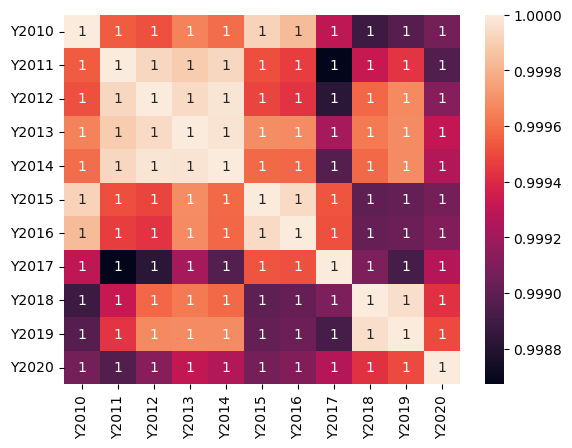

In [40]:
yearly_prod_hm=prod_data_view.iloc[:,:11]
sns.heatmap(yearly_prod_hm.corr(),annot=True)

<AxesSubplot:>

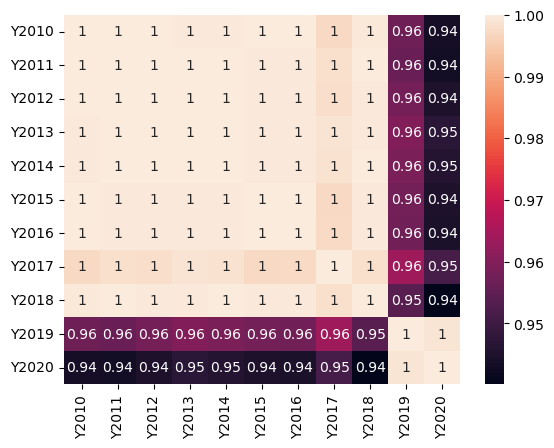

In [42]:
yearly_loss_hm=loss_dat_view.iloc[:,:11]
sns.heatmap(yearly_loss_hm.corr(),annot=True)

<AxesSubplot:>

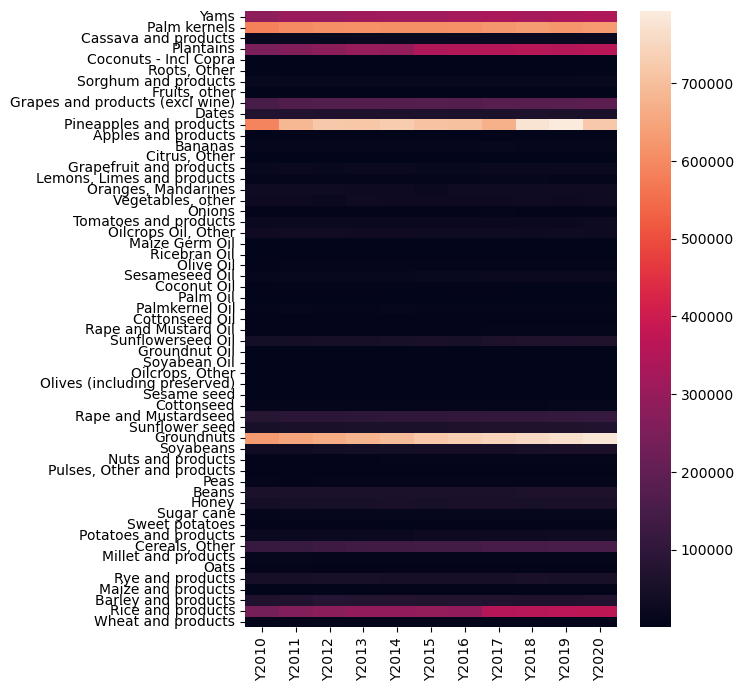

In [41]:
Prod_by_item_df_1 =Prod_by_item_df.iloc[:,1:12]
fig= plt.subplots(figsize=(6,8))
sns.heatmap(Prod_by_item_df_1,yticklabels=Prod_by_item_df['Item_production'].values[::-1])

In [43]:
K_m_val_x=prod_data_view.iloc[:,:-2]
K_m_val_x_l=loss_dat_view.iloc[:,:-2]


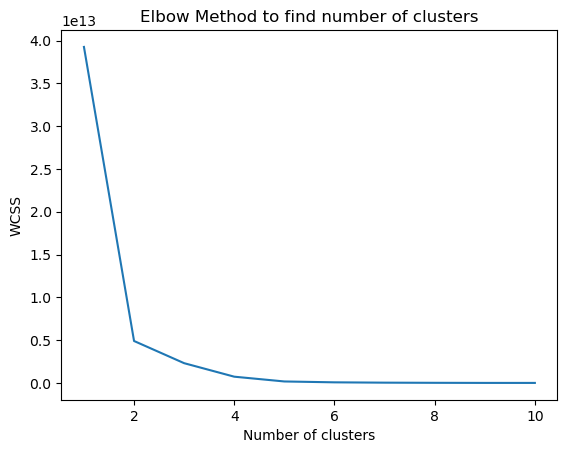

In [44]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(K_m_val_x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method to find number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

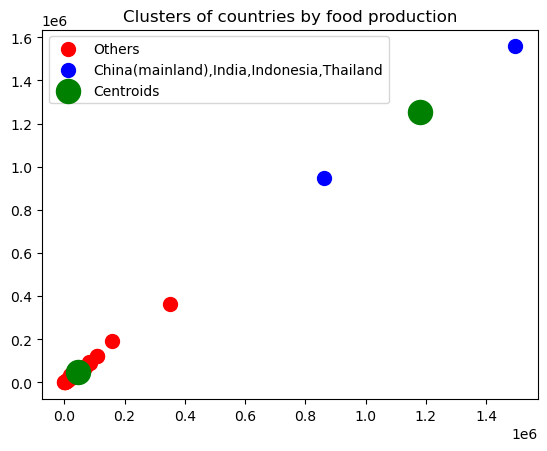

In [45]:
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(K_m_val_x)
K_m_val_x1 = K_m_val_x.to_numpy()
plt.scatter(K_m_val_x1[y_kmeans == 0, 0], K_m_val_x1[y_kmeans == 0,1],s=100,c='red',label='Others')
plt.scatter(K_m_val_x1[y_kmeans == 1, 0], K_m_val_x1[y_kmeans == 1,1],s=100,c='blue',label='China(mainland),India,Indonesia,Thailand')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='green',label='Centroids')
plt.title('Clusters of countries by food production')
plt.legend()
plt.show()

In [46]:
print('Silhoutte score for K-Means Algorithm is ' + str(silhouette_score(K_m_val_x, kmeans.labels_)))

Silhoutte score for K-Means Algorithm is 0.9036726136280709


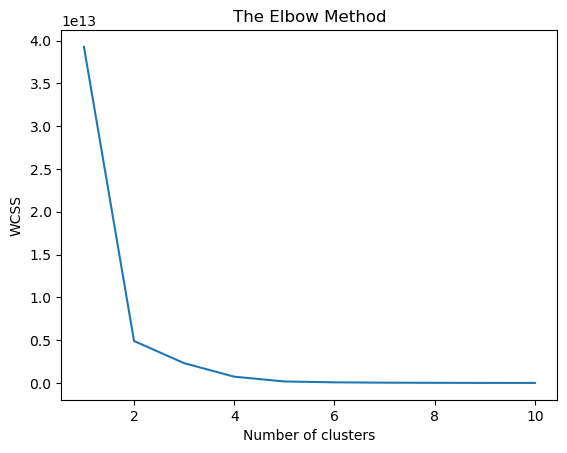

In [47]:
from sklearn.cluster import KMeans
wcss1 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(K_m_val_x_l)
    wcss1.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

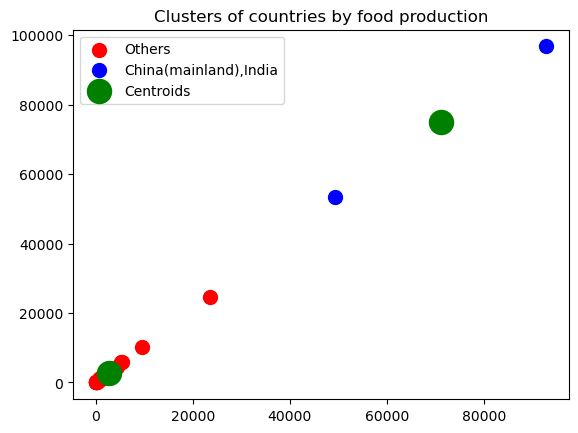

In [48]:
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(K_m_val_x_l)
K_m_val_xl1 = K_m_val_x_l.to_numpy()
plt.scatter(K_m_val_xl1[y_kmeans == 0, 0], K_m_val_xl1[y_kmeans == 0,1],s=100,c='red',label='Others')
plt.scatter(K_m_val_xl1[y_kmeans == 1, 0], K_m_val_xl1[y_kmeans == 1,1],s=100,c='blue',label='China(mainland),India')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='green',label='Centroids')
plt.title('Clusters of countries by food production')
plt.legend()
plt.show()

In [50]:
print('Silhoutte score of K means is ' + str(silhouette_score(K_m_val_xl1, kmeans.labels_)))

Silhoutte score of K means is 0.8876456168840551


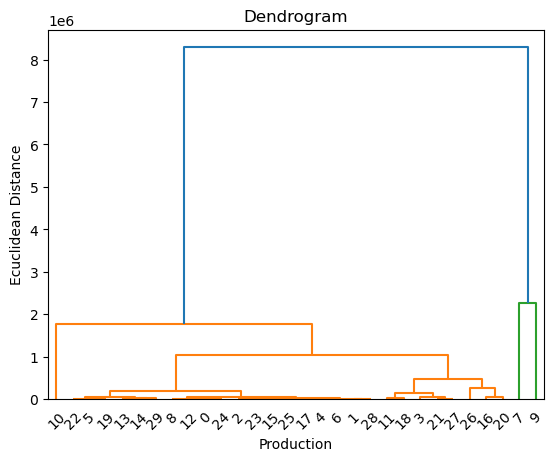

In [52]:
X=prod_data_view.iloc[:,:-2].values
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Production')
plt.ylabel('Ecuclidean Distance')
plt.show()

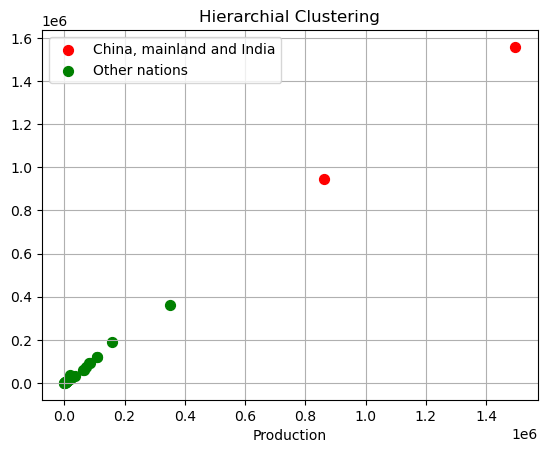

In [56]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label="China, mainland and India")
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'green',label="Other nations")
plt.legend()
plt.title('Hierarchial Clustering')
plt.xlabel('Production')
plt.grid()
plt.show()

In [57]:
print('Silhoutte score of Agglomerative Clustering is ' + str(silhouette_score(X, hc.labels_)))

Silhoutte score of Agglomerative Clustering is 0.9036726136280709


In [61]:
Affinity_model = AffinityPropagation(damping=0.7)
Affinity_model1=Affinity_model.fit(X)
res_affinity = Affinity_model1.predict(X)
clusters = unique(res_affinity)
clusters

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

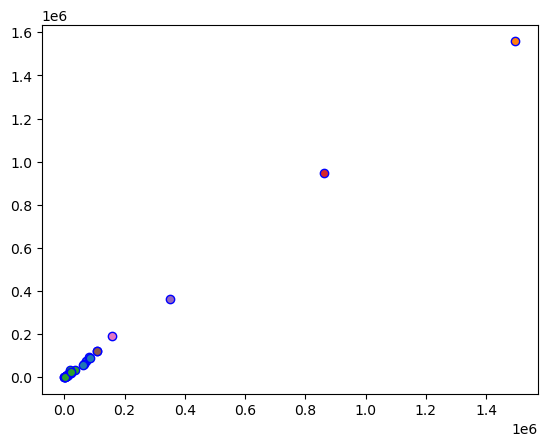

In [60]:
for cluster in clusters:
    # get data points that fall in this cluster
    index = where(res_affinity == cluster)
    # make the plot
    plt.scatter(X[index, 0], X[index, 1],edgecolors = 'b')
plt.show()

In [62]:
print('Silhoutte score of Affinity Propagation is ' + str(silhouette_score(X, Affinity_model1.labels_)))

Silhoutte score of Affinity Propagation is 0.6390122427965973


In [65]:
#DBSCAN Algorithm
db=DBSCAN(eps=10,min_samples=10,metric='euclidean')

In [66]:
X_db=prod_data_view.iloc[:,:-2]
model=db.fit(X_db)
label=model.labels_
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 0


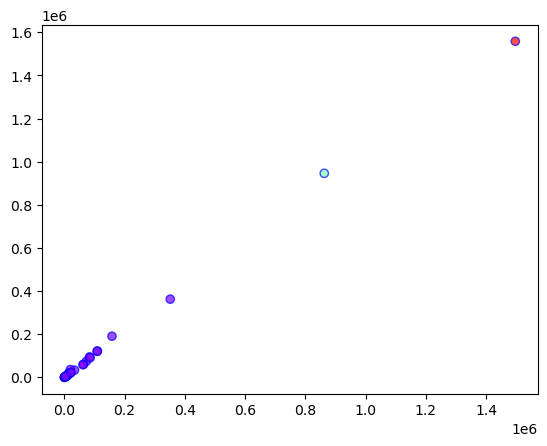

Silhoutte score of Birch is 0.8506341662580368


In [68]:
#BRICH
Birch_model = Birch(branching_factor = 10, n_clusters = 3, threshold = 1.5)
a=Birch_model.fit(X)
pred = Birch_model.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.show()
print('Silhoutte score of Birch is ' + str(silhouette_score(X, a.labels_)))